In [ ]:
#Fake News Detection using Python, TfidfVectorizer, and PassiveAggressiveClassifier
import pandas as pd


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
# Adjust the file paths according to your Google Drive structure
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
valid_data = pd.read_csv('/content/valid.csv')

In [ ]:
# Display the first few rows of each dataset
print("Train data:")
print(train_data.head())
print("\nTest data:")
print(test_data.head())
print("\nValidation data:")
print(valid_data.head())

Train data:
                                           Statement  Label
0  Says the Annies List political group supports ...  False
1  When did the decline of coal start? It started...   True
2  Hillary Clinton agrees with John McCain "by vo...   True
3  Health care reform legislation is likely to ma...  False
4  The economic turnaround started at the end of ...   True

Test data:
                                           Statement  Label
0  Building a wall on the U.S.-Mexico border will...   True
1  Wisconsin is on pace to double the number of l...  False
2  Says John McCain has done nothing to help the ...  False
3  Suzanne Bonamici supports a plan that will cut...   True
4  When asked by a reporter whether hes at the ce...  False

Validation data:
                                           Statement  Label
0  We have less Americans working now than in the...  FALSE
1  When Obama was sworn into office, he DID NOT u...  FALSE
2  Says Having organizations parading as being so...  FALS

In [ ]:
# Combine all data for preprocessing
all_data = pd.concat([train_data, test_data, valid_data], ignore_index=True)


In [ ]:
# Preprocess the data
all_data['Statement'] = all_data['Statement'].fillna('')
all_data['Label'] = all_data['Label'].map({True: 1, False: 0})  # Convert boolean to int
all_data = all_data.dropna()
X = all_data['Statement']
y = all_data['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [ ]:
# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
print(tfidf_train)
print(y_train)


  (0, 8282)	0.33858247725799673
  (0, 8477)	0.3885379211469287
  (0, 6654)	0.47526545266104725
  (0, 2944)	0.33306615000973544
  (0, 8939)	0.47526545266104725
  (0, 6329)	0.3191678513886951
  (0, 10257)	0.22481260693769184
  (0, 9530)	0.13893812672530106
  (1, 11802)	0.3309868325958572
  (1, 8653)	0.27994940193991796
  (1, 8190)	0.37060997967578685
  (1, 8013)	0.38144315759456654
  (1, 3431)	0.400681748180259
  (1, 81)	0.39114231536657273
  (1, 5950)	0.3322490559097796
  (1, 9268)	0.3244962251592333
  (2, 6406)	0.3973113508370196
  (2, 6856)	0.49785006077517563
  (2, 7824)	0.32577249304850947
  (2, 11809)	0.3013309713986174
  (2, 2876)	0.26407140858049566
  (2, 3382)	0.4478800774066445
  (2, 11250)	0.26753025824112053
  (2, 10257)	0.23549569908835233
  (3, 3138)	0.28206818214405893
  :	:
  (10229, 2502)	0.2444762410353304
  (10229, 1532)	0.2545522885777876
  (10229, 2329)	0.2404100480979334
  (10229, 6838)	0.23679664497247113
  (10229, 1268)	0.2241992506729909
  (10229, 9843)	0.2576486

In [ ]:
# Initialize PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


PassiveAggressiveClassifier(max_iter=50)

In [ ]:
# Make predictions
y_pred = pac.predict(tfidf_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


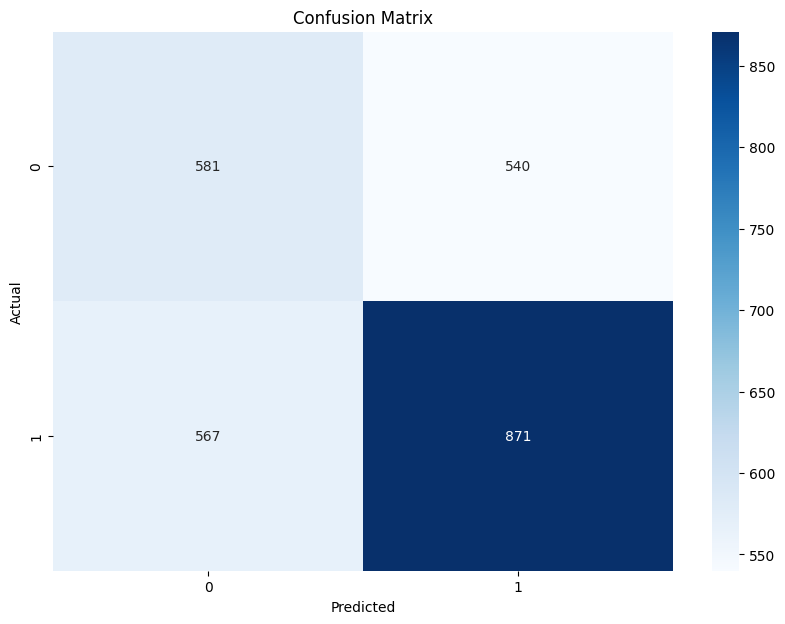

In [ ]:
# Calculate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Function to predict if a news article is fake or real
def predict_news(news_text):
    tfidf_news = tfidf_vectorizer.transform([news_text])
    prediction = pac.predict(tfidf_news)
    return "Fake" if prediction[0] == 0 else "Real"


In [ ]:
# Example usage
example_news = "Building a wall on the U.S.-Mexico border will take literally years."
result = predict_news(example_news)
print(f"Prediction for the example news: {result}")

Prediction for the example news: Real


In [ ]:
# Interactive prediction
while True:
    user_input = input("Enter a news headline (or 'quit' to exit): ")
    if user_input.lower() == 'quit':
        break
    prediction = predict_news(user_input)
    print(f"Prediction: {prediction}")

print("Thank you for using the Fake News Detector!")

Enter a news headline (or 'quit' to exit): exist
Prediction: Fake
Enter a news headline (or 'quit' to exit): quit
Thank you for using the Fake News Detector!
